In [1]:
import numpy as np
from time import time

In [2]:
obj = [
    [0, 0, 0, 0, 1], 
    [0, 1, 1, 0, 0], 
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0]
]
obj = np.array(obj)

In [3]:
obj

array([[0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0]])

In [4]:
# shape

In [5]:
def pi(a):
    for i in range(len(a)):
        if a[i] == np.nan:
            a[i] = 0
            
    s = np.nansum(a)
    if s == 0:
        s = 1e-5
        print('here')
    for i in range(len(a)):
        a[i] /= s
    return a

def get_pi(a):
    for i in range(len(a)):
        for j in range(len(a[0])):
            a[i][j] = pi(a[i][j])
    return a

In [6]:
def action(s):
    # eps는 사전 설정
    ## s_next 생성
    if np.random.rand() > eps:
        return np.argmax(v[s])
    else:
        return np.random.choice([0, 1, 2, 3]) # 상하좌우
    
def state_map(s, a):
    s = list(s)
    if a == 0:
        s[0] -= 1
    elif a == 1:
        s[0] += 1
    elif a == 2:
        s[1] -= 1
    else:
        s[1] += 1
    return tuple(s)


In [7]:
def update(s, a, r, s_next, v):
    # lr, gamma 는 위에서 설정하기
    if s_next == goal:
        v[s][a] = v[s][a] + lr * (r - v[s][a])
    else:
        v[s][a] = v[s][a] + lr * (r + gamma*np.max(v[s_next]) - v[s][a])
        
#     v[s] = pi(v[s])
    return v


In [8]:
def is_wall(s):
    a = shape[0] - 1
    b = shape[1] -1
    if s[0] < 0 or s[0] > a:
        return True
    elif s[1] < 0 or s[1] > b:
        return True
    elif obj[s] == 1:
        return True
    else:
        return False

In [9]:
def play(s):
    global v, fail_hist, hist, eps
    temp_hist = []
    while 1:
        eps -= 0.01
        temp_hist.append(s)
#         print(s)
        a = action(s)
        s_next = state_map(s, a)
#         print(a, s, s_next)
        
#         if (0 > s[0] or s[0] > 3) or (0 > s[1] or s[1] > 4) or obj[s] == 1: ## 가면 안되는 곳
        if is_wall(s_next):
            fail_hist.append((s, s_next))
#             r = -1
            v[s][a] = 0
            v[s] = pi(v[s])
#             v = update(s, a, r, s_next, v)
#             print(v[s], s_next)
            s_next = (0, 0)
            
            
        elif s_next[0] == goal[0] and s_next[1] == goal[1]: ## 도착
            r = 1
            v = update(s, a, r, s_next, v)
            break
        else: ## 갈곳이 남음
            r = 0
            v = update(s, a, r , s_next, v)
            
#         print(v[s])
        fake_obj[s_next] = 2
#         print(fake_obj)
        fake_obj[s_next] = obj[s_next]
#         print(eps)
            
        s = s_next
        
    hist.append(temp_hist)

In [10]:
shape = obj.shape
value = [
    [0, 0, 0, 0, 1], 
    [0, 1, 1, 0, 0], 
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0]
]
for i in range(shape[0]):
    for j in range(shape[1]):
        value[i][j] = [0.25, 0.25, 0.25, 0.25] # 위, 아래, 좌, 우
v = np.array(value)

In [11]:
lr = 0.1
eps = 0.5
gamma = 0.9
v = np.array(value)
fail_hist = []
hist = []
fake_obj = obj.copy()

s_0 = (0, 0)
goal = (3, 4)

start = time()
for i in range(100):
    play(s_0)
    print('succes', i)
    print(eps)
#     eps = 0.5

lt = time() - start

succes 0
-18.36000000000007
succes 1
-18.690000000000122
succes 2
-18.900000000000155
succes 3
-19.13000000000019
succes 4
-19.340000000000224
succes 5
-19.550000000000257
succes 6
-19.660000000000274
succes 7
-19.990000000000325
succes 8
-20.060000000000336
succes 9
-20.290000000000372
succes 10
-20.480000000000402
succes 11
-20.550000000000413
succes 12
-20.760000000000446
succes 13
-20.97000000000048
succes 14
-21.18000000000051
succes 15
-21.250000000000522
succes 16
-21.440000000000552
succes 17
-21.510000000000563
succes 18
-21.700000000000593
succes 19
-21.770000000000604
succes 20
-21.840000000000614
succes 21
-22.030000000000644
succes 22
-22.100000000000655
succes 23
-22.170000000000666
succes 24
-22.360000000000696
succes 25
-22.430000000000707
succes 26
-22.500000000000718
succes 27
-22.57000000000073
succes 28
-22.64000000000074
succes 29
-22.71000000000075
succes 30
-22.78000000000076
succes 31
-22.850000000000772
succes 32
-22.920000000000783
succes 33
-22.99000000000079

In [12]:
v

array([[[0.        , 0.19087807, 0.        , 0.48681563],
        [0.        , 0.        , 0.20878478, 0.56588872],
        [0.        , 0.        , 0.22408938, 0.64474635],
        [0.        , 0.72479832, 0.24337602, 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ]],

       [[0.18991111, 0.1910852 , 0.        , 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.25814692, 0.80883316, 0.        , 0.25738141],
        [0.        , 0.25259999, 0.25331229, 0.        ]],

       [[0.18962061, 0.19105038, 0.        , 0.19044764],
        [0.        , 0.19026751, 0.18970101, 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.26900633, 0.        , 0.        , 0.89978416],
        [0.24839395, 0.99998008, 0.25      , 0.25      ]],

       [[0.19063985, 0.        , 0.        , 0.1909245 ],
        [0.18999188, 0.        , 0.19080176, 0.        ],
        

In [13]:
value = [
    [0, 0, 0, 0, 1], 
    [0, 1, 1, 0, 0], 
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0]
]

In [14]:
eps

-27.610000000001516

In [15]:
lt

0.12949490547180176

In [16]:
c = 0
for h in hist:
    if len(h) == 7:
        c += 1
        
print(c)

83


In [17]:
lh = list(map(lambda x: len(x), hist))

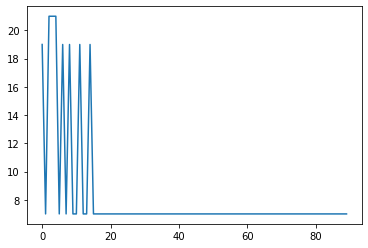

In [18]:
import matplotlib.pyplot as plt

plt.plot(lh[10:])

In [19]:
lh

[1886,
 33,
 21,
 23,
 21,
 21,
 11,
 33,
 7,
 23,
 19,
 7,
 21,
 21,
 21,
 7,
 19,
 7,
 19,
 7,
 7,
 19,
 7,
 7,
 19,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7]